In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train=pd.read_csv('train.csv')

In [11]:
train.head().T

,0,1,2,3,4
Id,1,2,3,4,5
Hazard,1,4,1,1,1
T1_V1,15,16,10,18,13
T1_V2,3,14,10,18,19
T1_V3,2,5,5,5,5
T1_V4,N,H,N,N,N
T1_V5,B,B,K,K,H
T1_V6,N,N,N,N,N
T1_V7,B,B,B,B,B
T1_V8,B,B,B,B,B


In [12]:
train.shape

(50999, 34)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
Id        50999 non-null int64
Hazard    50999 non-null int64
T1_V1     50999 non-null int64
T1_V2     50999 non-null int64
T1_V3     50999 non-null int64
T1_V4     50999 non-null object
T1_V5     50999 non-null object
T1_V6     50999 non-null object
T1_V7     50999 non-null object
T1_V8     50999 non-null object
T1_V9     50999 non-null object
T1_V10    50999 non-null int64
T1_V11    50999 non-null object
T1_V12    50999 non-null object
T1_V13    50999 non-null int64
T1_V14    50999 non-null int64
T1_V15    50999 non-null object
T1_V16    50999 non-null object
T1_V17    50999 non-null object
T2_V1     50999 non-null int64
T2_V2     50999 non-null int64
T2_V3     50999 non-null object
T2_V4     50999 non-null int64
T2_V5     50999 non-null object
T2_V6     50999 non-null int64
T2_V7     50999 non-null int64
T2_V8     50999 non-null int64
T2_V9     50999 non-null int64
T2_V10    

In [14]:
print(f'Number of unique values in target column {train.Hazard.nunique()} , and \nunique values:{train.Hazard.unique().tolist()}')

Number of unique values in target column 50 , and 
unique values:[1, 4, 5, 7, 15, 14, 8, 16, 6, 11, 3, 13, 2, 18, 10, 17, 22, 9, 21, 20, 12, 19, 37, 23, 28, 27, 31, 38, 41, 26, 33, 29, 30, 25, 24, 36, 51, 42, 34, 46, 32, 69, 40, 35, 44, 39, 49, 52, 63, 64]


In [15]:
train.nunique()

Id        50999
Hazard       50
T1_V1        19
T1_V2        24
T1_V3         9
T1_V4         8
T1_V5        10
T1_V6         2
T1_V7         4
T1_V8         4
T1_V9         6
T1_V10        5
T1_V11       12
T1_V12        4
T1_V13        4
T1_V14        5
T1_V15        8
T1_V16       18
T1_V17        2
T2_V1       100
T2_V2        39
T2_V3         2
T2_V4        22
T2_V5         6
T2_V6         7
T2_V7         7
T2_V8         3
T2_V9        25
T2_V10        7
T2_V11        2
T2_V12        2
T2_V13        5
T2_V14        7
T2_V15       12
dtype: int64

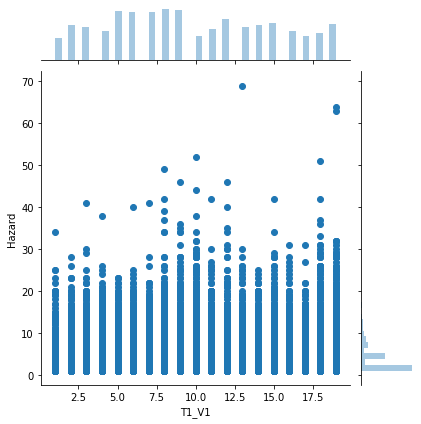

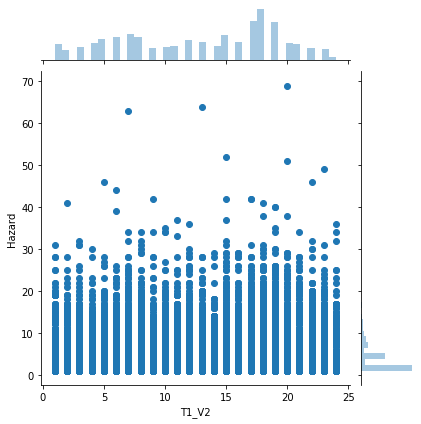

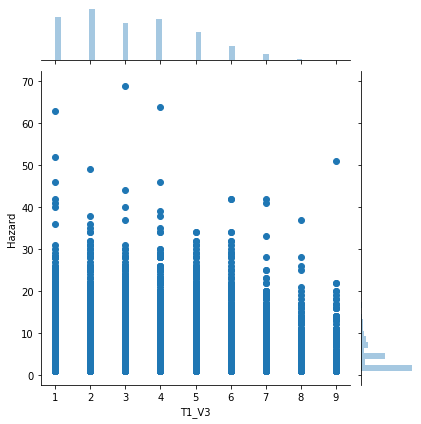

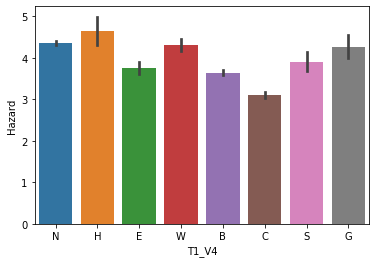

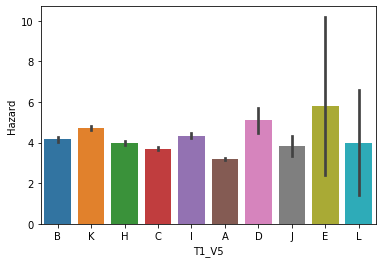

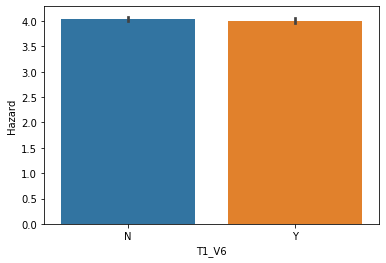

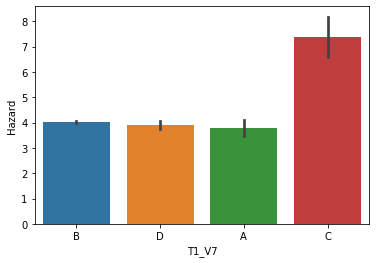

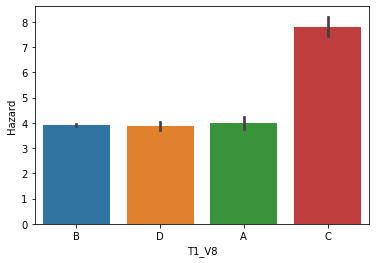

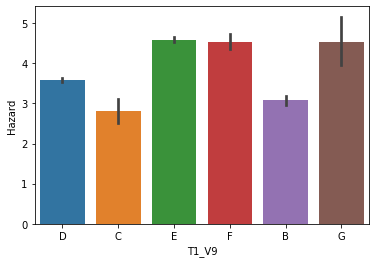

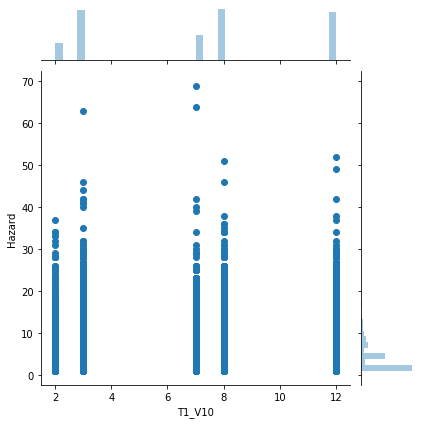

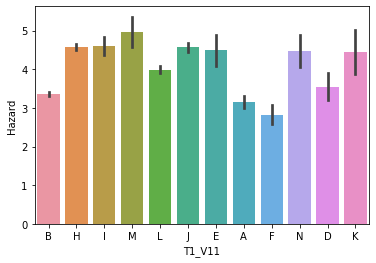

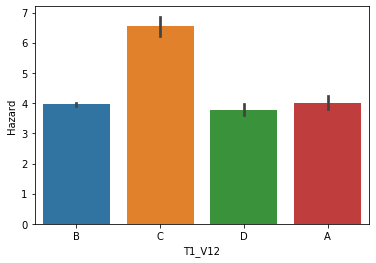

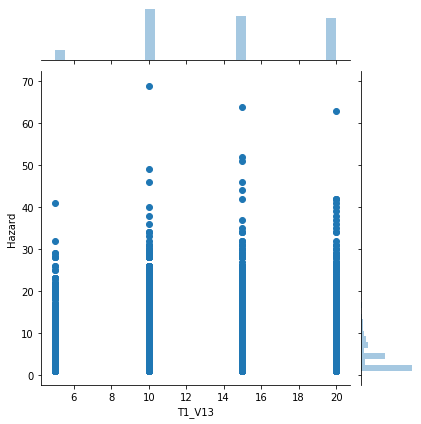

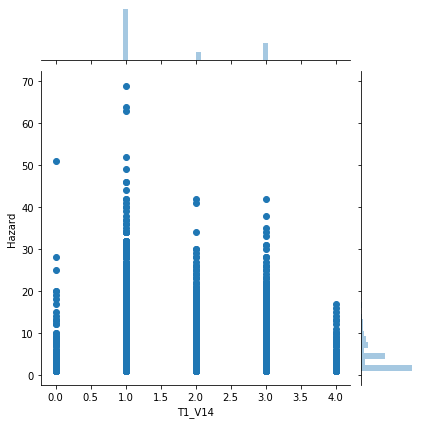

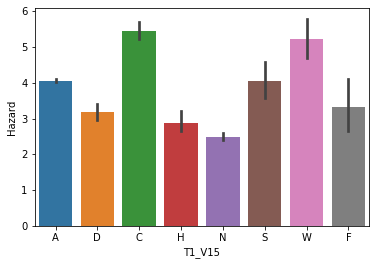

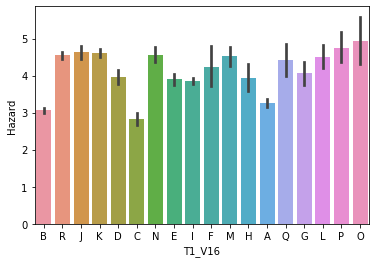

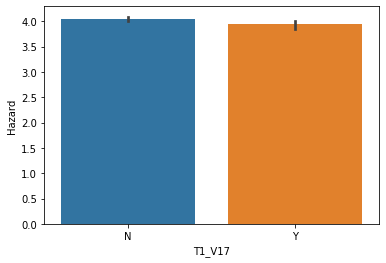

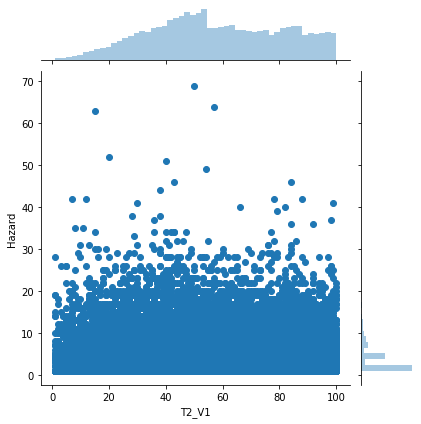

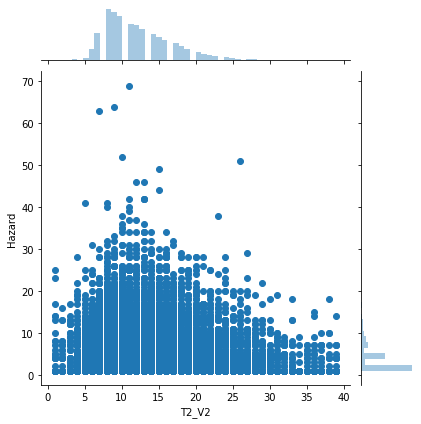

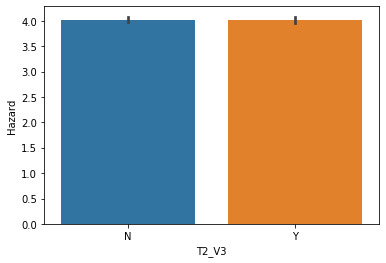

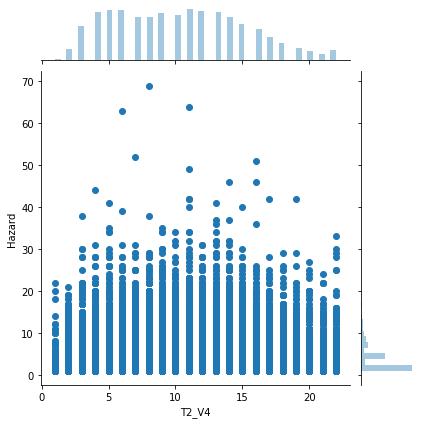

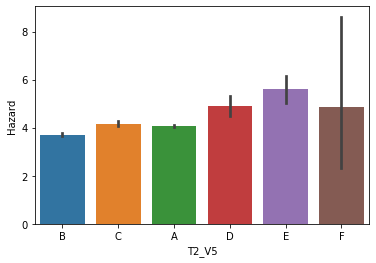

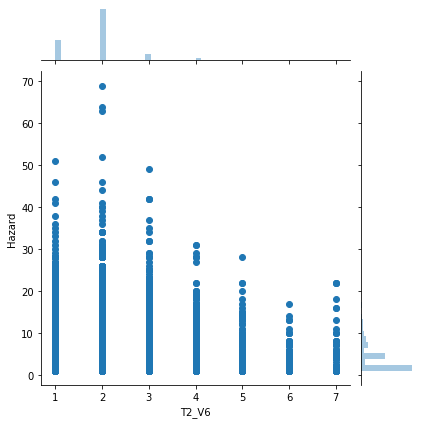

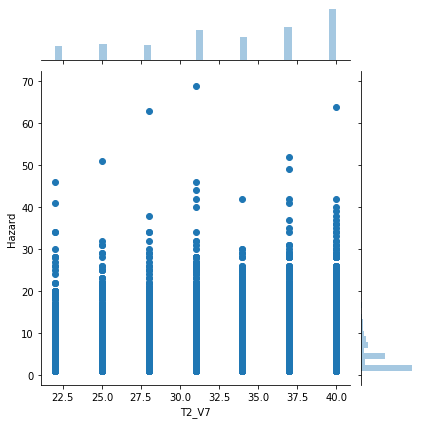

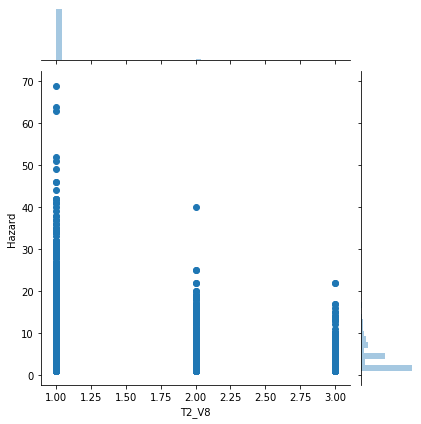

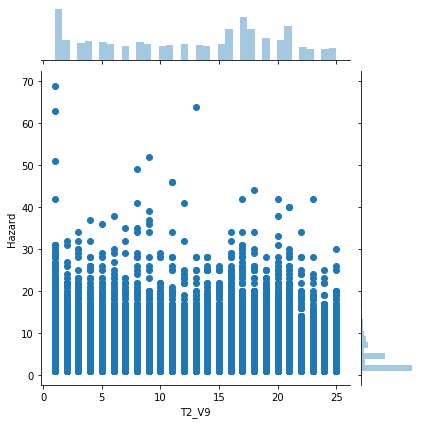

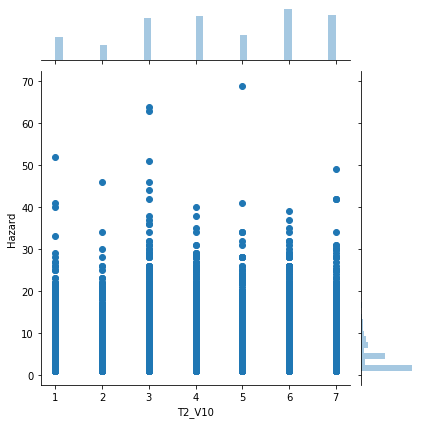

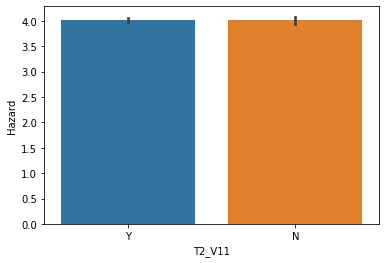

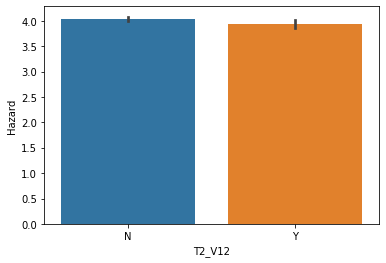

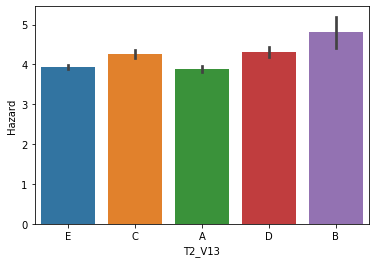

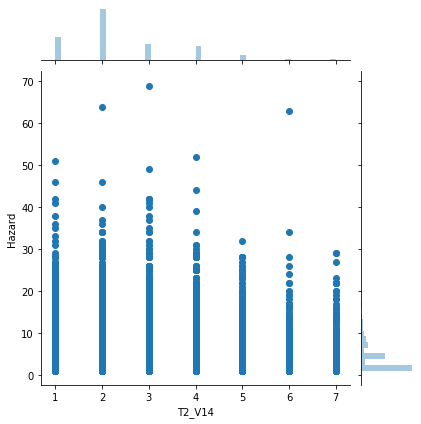

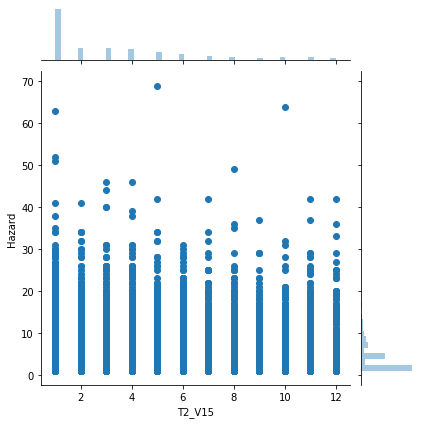

In [16]:
for i in train.drop(columns=['Hazard','Id']):
    if(train[i].dtype!='object'):
        sns.jointplot(i,'Hazard',train)
        plt.show()
    else:
        sns.barplot(train[i],train.Hazard)
        plt.show()
        

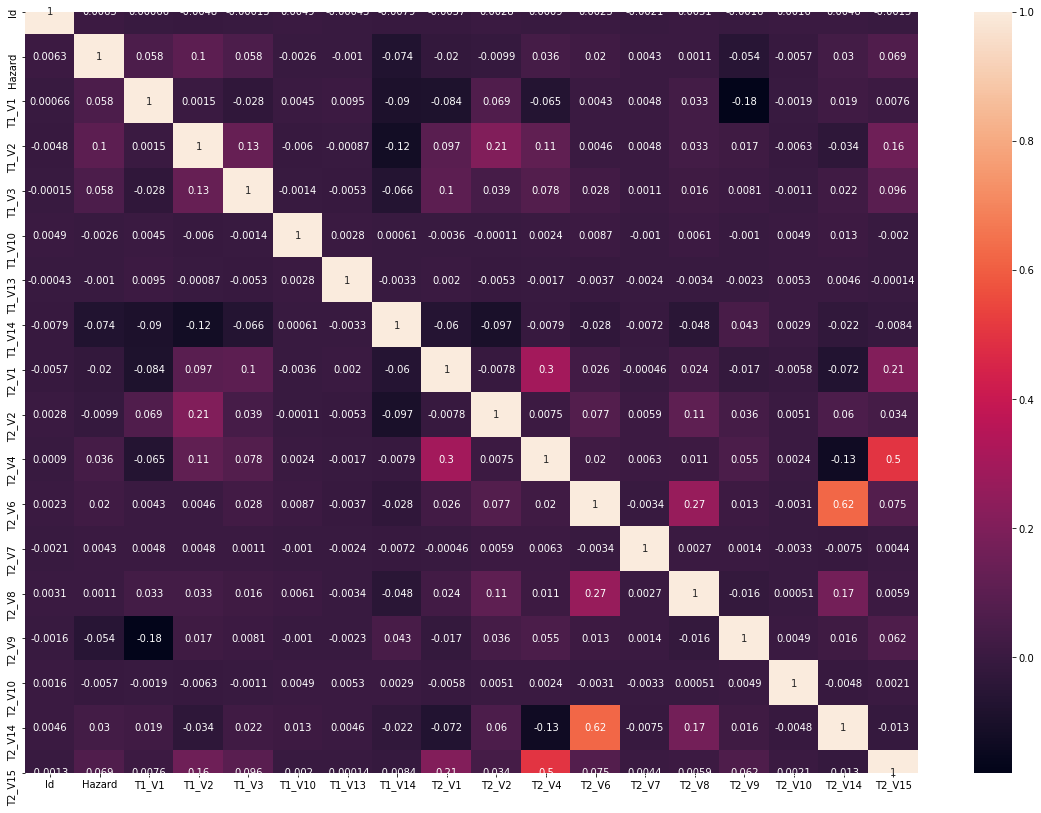

In [17]:
plt.figure(figsize=(20,14))
sns.heatmap(train.corr(),annot=True)
plt.show()

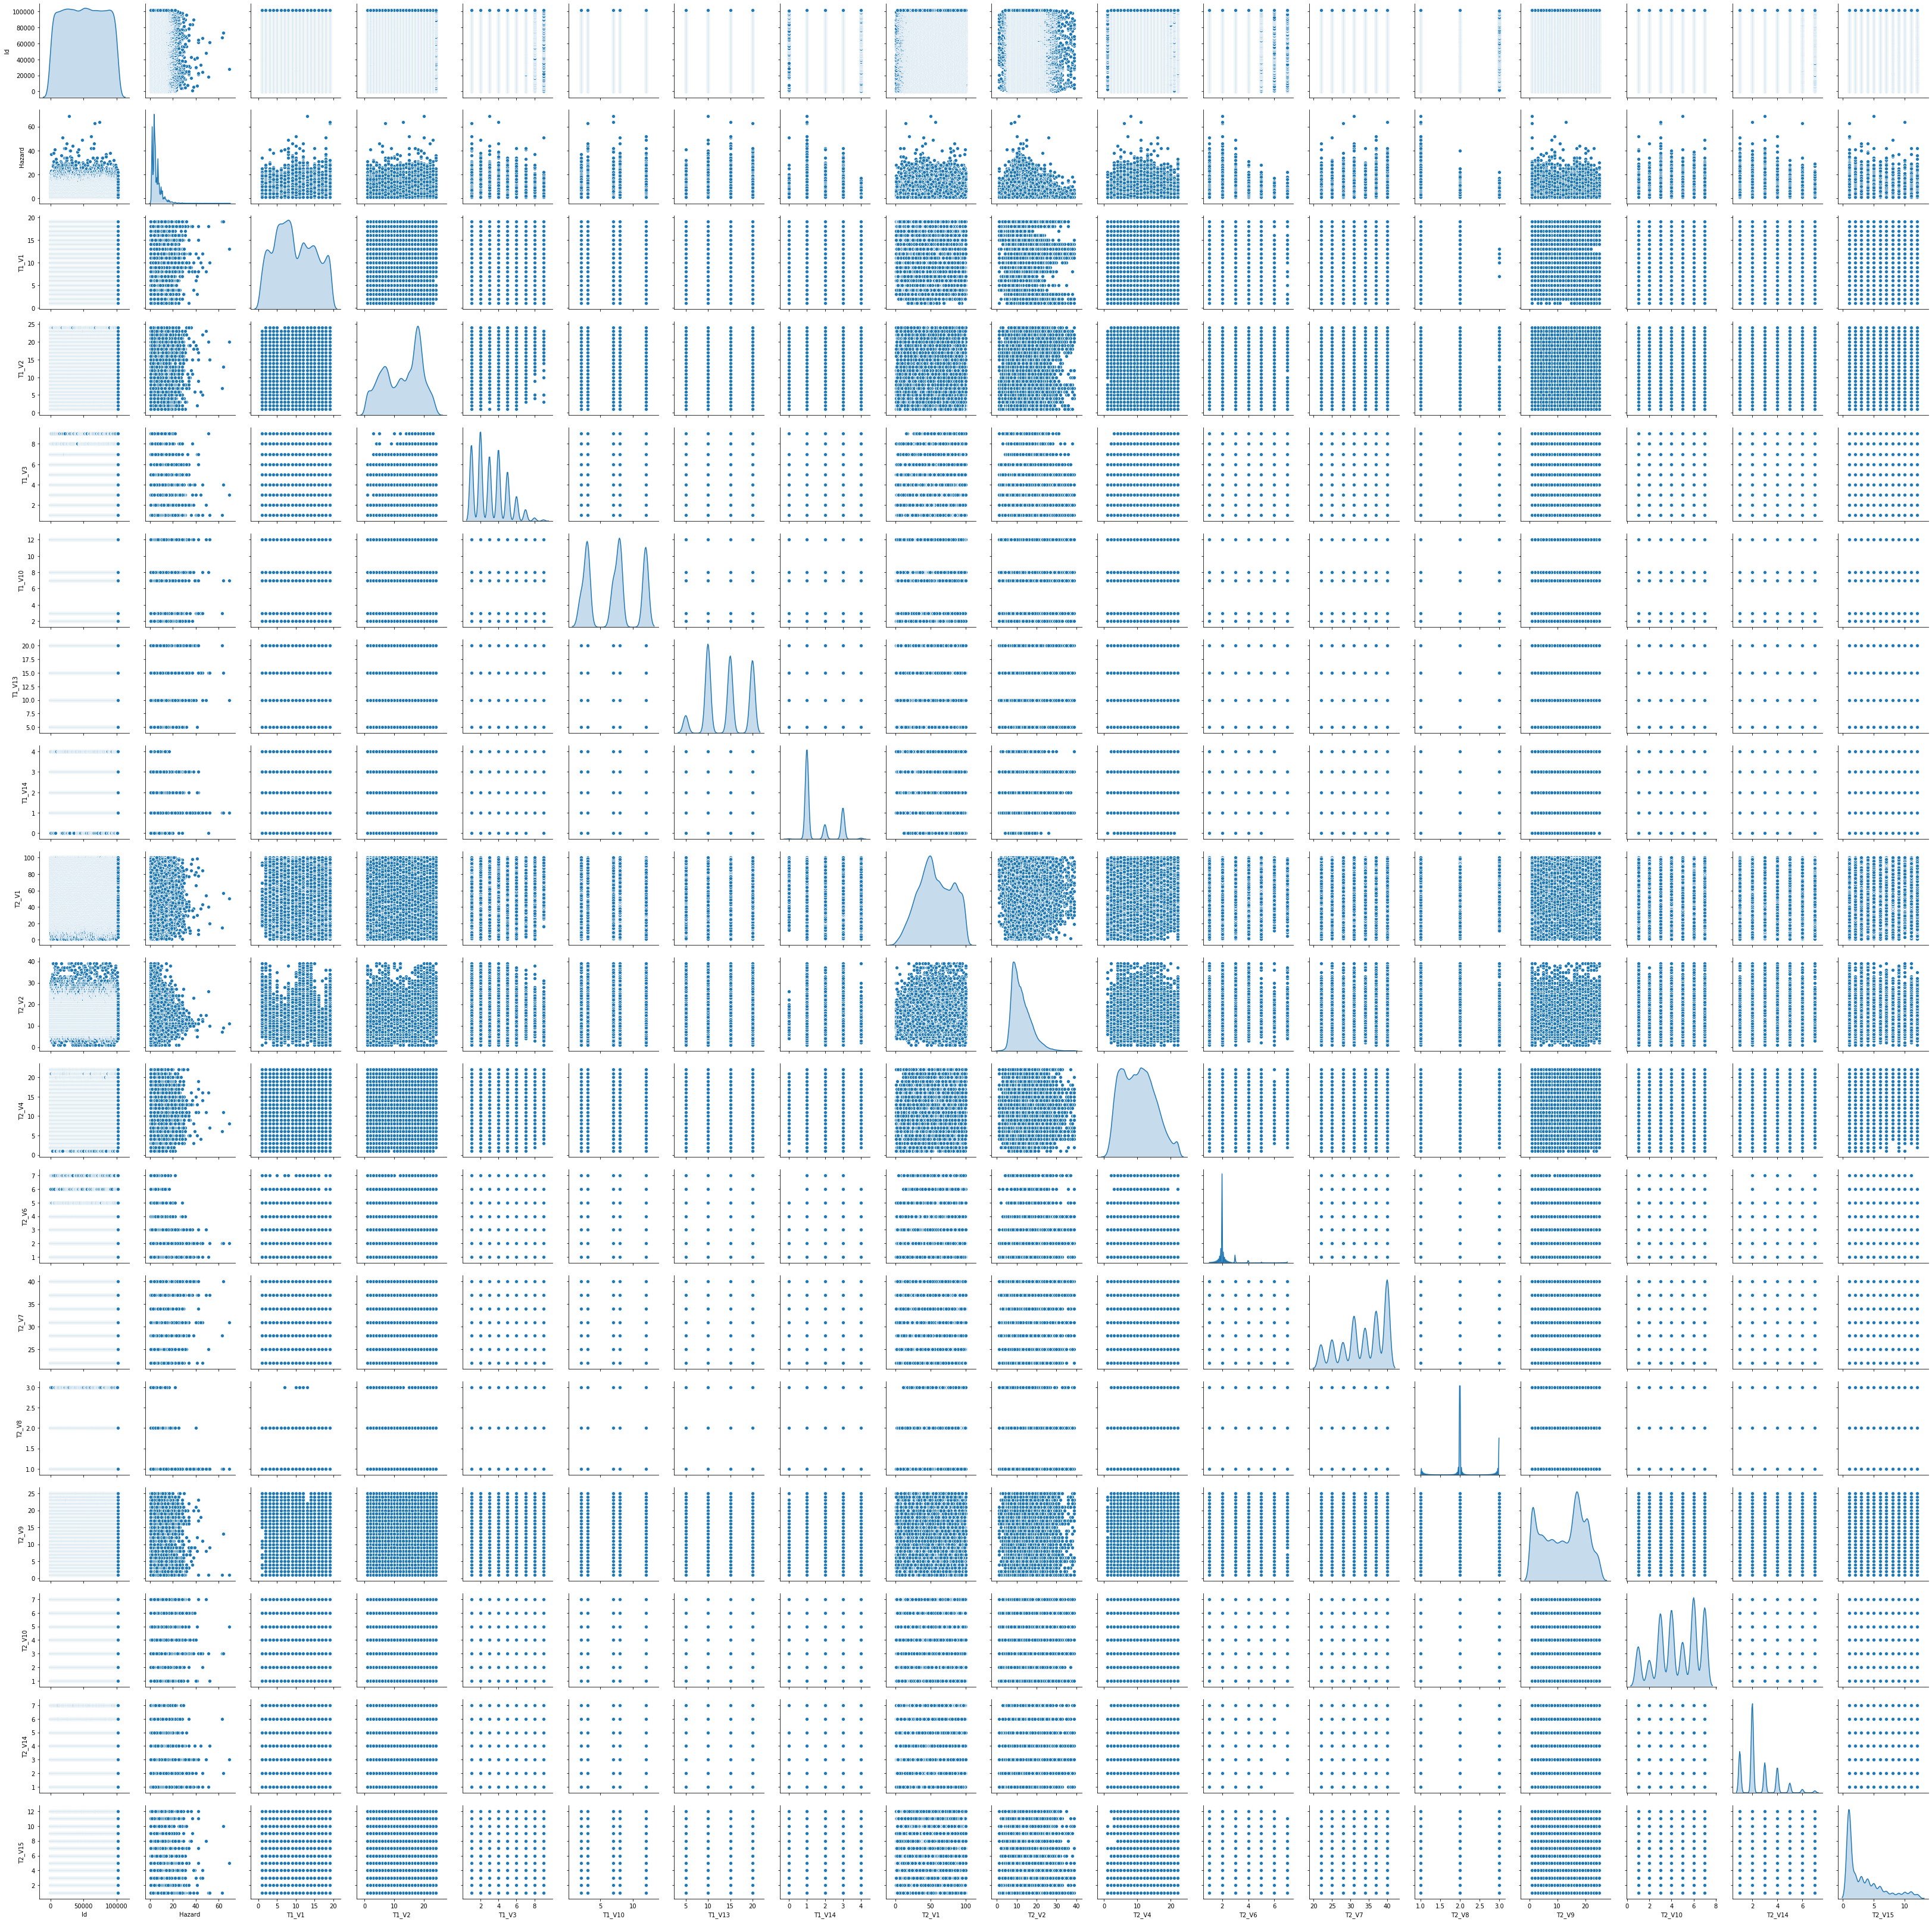

In [18]:
sns.pairplot(train,diag_kind='kde')
plt.show()

In [19]:
numerical_features=['T2_V1','T2_V2','T2_V4','T2_V9','T2_V15','T1_V1','T1_V2']
categorical_features=['T2_V3','T2_V5','T2_V6','T2_V7','T2_V8','T2_V10','T2_V11','T2_V12','T2_V13','T2_V14','T1_V3','T1_V4','T1_V5','T1_V6','T1_V7','T1_V8','T1_V9','T1_V10','T1_V11','T1_V12','T1_V13','T1_V14','T1_V15','T1_V16','T1_V17']

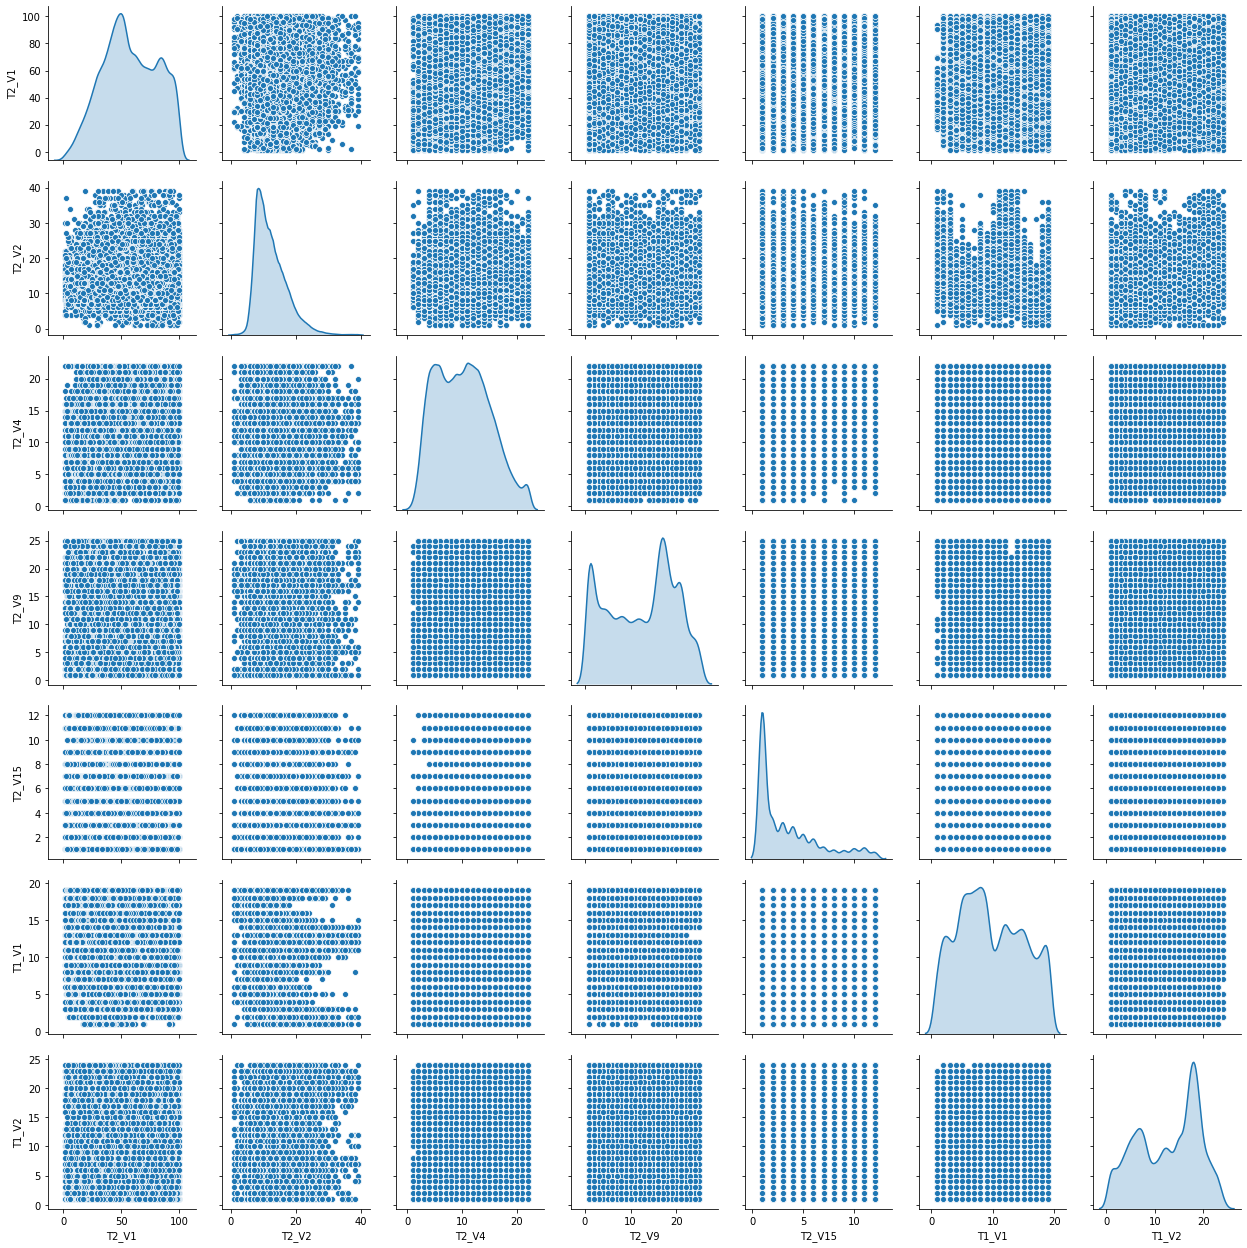

In [20]:
sns.pairplot(train[numerical_features],diag_kind='kde')

In [21]:
def transform(data):
    test_convert={}
    for i in data.drop(columns=['Id']).columns:
        if(data[i].nunique()==2):
            cat={data[i].value_counts().sort_values().index[0] : 0,data[i].value_counts().sort_values().index[1] :1}
            test_convert[i]=cat
            data[i]=data[i].map(cat)
        elif(i in categorical_features):
            group=data.groupby(i).Hazard.mean().sort_values(ascending=False)
            group=group/group.tolist()[-1]
            test_convert[i]=group
            data[i]=data[i].replace(group.index,group.values)
        else:
            data[i]=data[i]
    return data.drop(columns='Id'),test_convert
        
 

In [22]:
data,test_convert=transform(train)
data

,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,15,3,1.030301,1.402577,1.301792,1,1.060362,1.005559,1.276194,...,1.208079,1.019152,1.040058,11,1.005652,1,1,1.017386,1.000000,2
1,4,16,14,1.113744,1.495874,1.301792,1,1.060362,1.005559,1.000000,...,1.208079,1.000000,1.040058,18,1.012476,1,0,1.017386,1.000000,1
2,1,10,10,1.113744,1.402577,1.478554,1,1.060362,1.005559,1.635451,...,1.000000,1.019152,1.000000,14,1.005652,1,0,1.017386,1.107265,1
3,1,18,18,1.113744,1.402577,1.478554,1,1.060362,1.005559,1.635451,...,1.208079,1.004748,1.040058,1,1.005652,1,1,1.101285,1.000000,6
4,1,13,19,1.113744,1.402577,1.249124,1,1.060362,1.005559,1.635451,...,1.202473,1.000000,1.040058,2,1.000000,0,1,1.017386,1.012828,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50994,7,12,24,1.000000,1.402577,1.249124,0,1.060362,1.005559,1.617487,...,1.318228,1.004748,1.000000,9,1.000000,1,0,1.017386,1.070080,1
50995,4,12,17,1.075719,1.402577,1.478554,1,1.060362,1.005559,1.635451,...,1.208079,1.019152,1.040058,4,1.000000,0,1,1.000000,1.099843,2
50996,3,18,7,1.113744,1.386196,1.301792,0,1.060362,1.005559,1.276194,...,1.208079,1.027751,1.040058,1,1.013545,0,1,1.017386,1.012828,1
50997,14,18,17,1.113744,1.172310,1.000000,1,1.060362,1.000000,1.276194,...,1.202473,1.018675,1.040058,7,1.018399,1,1,1.101285,1.000000,6


In [23]:
test_convert.keys()

dict_keys(['T1_V3', 'T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13', 'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V10', 'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14'])

In [24]:
def transform_test(df,test_convert):
    for i in df.drop(columns='Id'):
        if(df[i].nunique()==2):
            df[i]=df[i].map(test_convert[i])
        elif(str(i) in test_convert.keys()):
            df[i]=df.replace(test_convert[i].index,test_convert[i].values)
        else:
            df[i]=df[i]
    return df.drop(columns='Id')
            

In [25]:
train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,1.030301,1.402577,1.301792,1,1.060362,1.005559,...,1.208079,1.019152,1.040058,11,1.005652,1,1,1.017386,1.000000,2
1,2,4,16,14,1.113744,1.495874,1.301792,1,1.060362,1.005559,...,1.208079,1.000000,1.040058,18,1.012476,1,0,1.017386,1.000000,1
2,3,1,10,10,1.113744,1.402577,1.478554,1,1.060362,1.005559,...,1.000000,1.019152,1.000000,14,1.005652,1,0,1.017386,1.107265,1
3,4,1,18,18,1.113744,1.402577,1.478554,1,1.060362,1.005559,...,1.208079,1.004748,1.040058,1,1.005652,1,1,1.101285,1.000000,6
4,5,1,13,19,1.113744,1.402577,1.249124,1,1.060362,1.005559,...,1.202473,1.000000,1.040058,2,1.000000,0,1,1.017386,1.012828,1


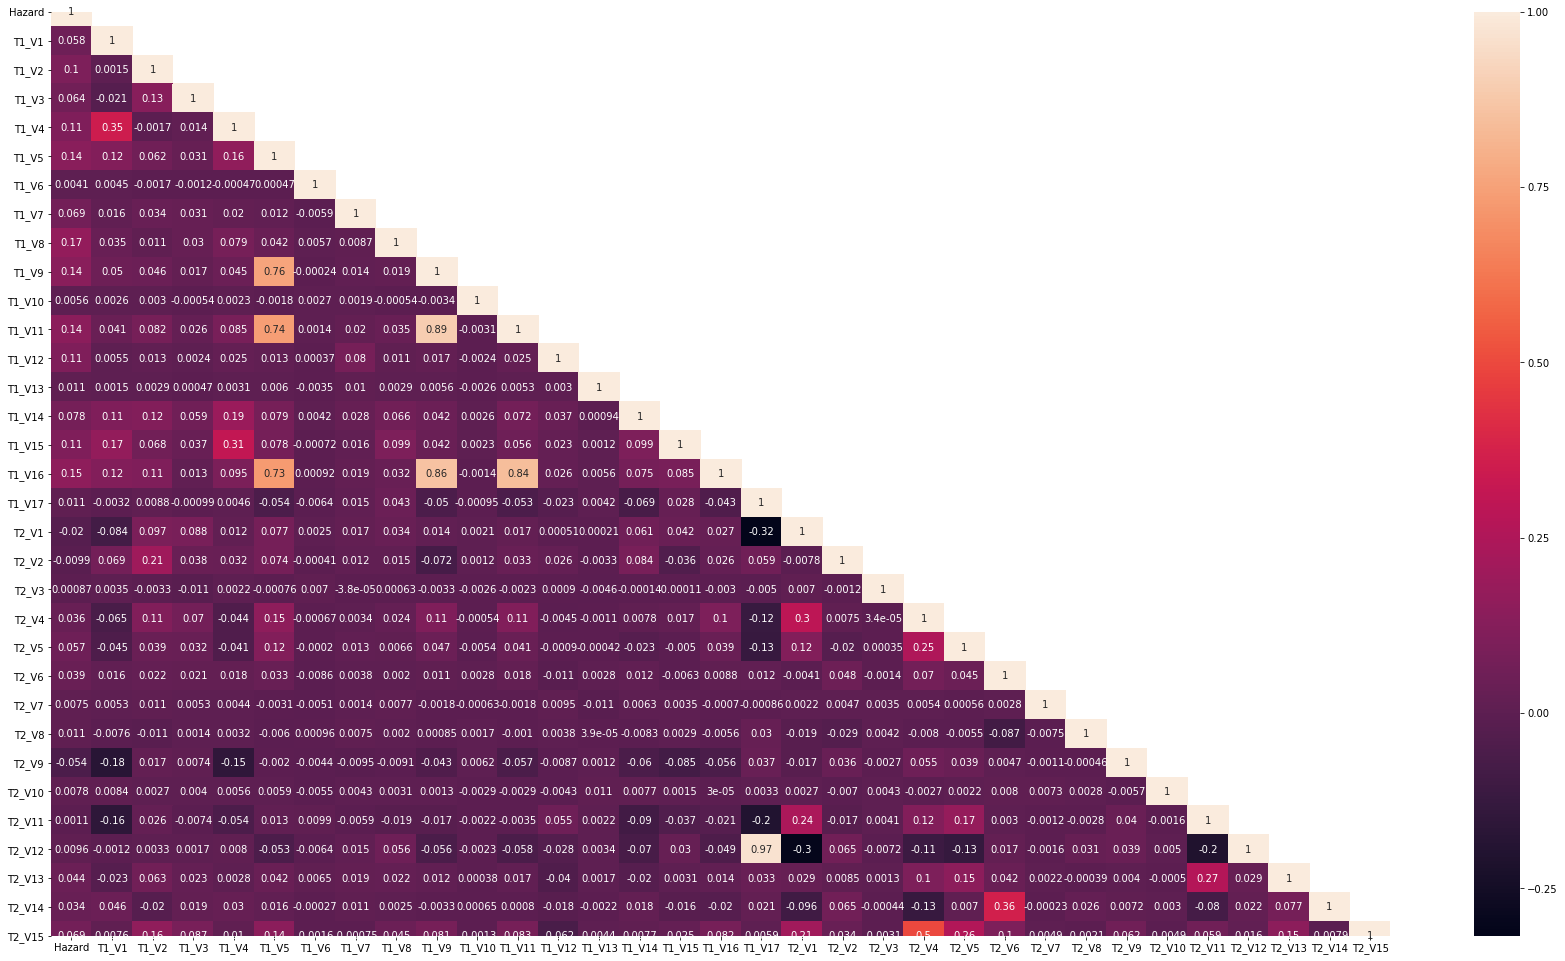

In [26]:
corr=data.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(30,17))
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

In [27]:
def gini(y_true,y_pred):
    array=np.array(np.c_[y_true,y_pred,np.arange(len(y_true))])
    array=np.array(sorted(array,key=lambda b: b[1]))
    total_loss=array[:,0].sum()
    gini_sum=array[:,0].cumsum().sum()/total_loss
    gini_sum-=(len(y_true)+1)/2
    return -gini_sum/len(y_true)

normalized_gini=lambda y_true,y_pred: gini(y_true,y_pred)/gini(y_true,y_true)
    


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(columns='Hazard'),data.Hazard,test_size=0.3,shuffle=True,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred=lr.predict(X_test)

In [33]:
normalized_gini(y_test,y_pred)

0.33576249894113813

In [34]:
def scorer(estimator,X,y):
    y_pred=estimator.predict(X)
    score=normalized_gini(y,y_pred)
    return score

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(lr,data.drop(columns='Hazard'),data.Hazard,scoring=scorer)

array([0.32959767, 0.34490752, 0.32284917, 0.34089951, 0.32122817])

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint

In [38]:
gradboost=GradientBoostingRegressor(random_state=42)

In [39]:
cross_val_score(gradboost,data.drop(columns='Hazard'),data.Hazard,scoring=scorer,n_jobs=-1)

array([0.37193444, 0.38286393, 0.36726972, 0.37836144, 0.36085272])

In [40]:
np.mean([0.37193444, 0.38286393, 0.36726972, 0.37836144, 0.36085272])

0.37225644999999996

In [41]:
np.var([0.37193444, 0.38286393, 0.36726972, 0.37836144, 0.36085272])

6.096115185927995e-05

In [43]:
params={'n_estimators':sp_randint(1,500)}

In [44]:
rsearch=RandomizedSearchCV(gradboost,params,scoring=scorer)

In [45]:
rsearch.fit(data.drop(columns='Hazard'),data.Hazard)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

In [46]:
rsearch.best_score_

0.38213121619269996

In [47]:
rsearch.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=423,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
pd.DataFrame(rsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.747036,0.028534,0.059355,0.006246,260,{'n_estimators': 260},0.380576,0.392153,0.376062,0.386034,0.368954,0.380756,0.007989,3
1,13.311215,2.217884,0.069436,0.022538,187,{'n_estimators': 187},0.378769,0.389254,0.373914,0.384412,0.368032,0.378876,0.007491,8
2,19.707703,0.125549,0.065603,0.006254,306,{'n_estimators': 306},0.380862,0.392660,0.378297,0.386559,0.369797,0.381635,0.007716,2
3,10.378053,1.208230,0.059705,0.025687,152,{'n_estimators': 152},0.377204,0.387535,0.370763,0.383036,0.366181,0.376944,0.007790,10
4,13.797727,1.991602,0.054387,0.007019,199,{'n_estimators': 199},0.379460,0.389875,0.374433,0.384823,0.368489,0.379416,0.007521,7
5,17.305172,2.807485,0.054388,0.007002,247,{'n_estimators': 247},0.380868,0.391979,0.375249,0.385984,0.368734,0.380563,0.008099,4
6,14.758188,2.847273,0.056231,0.007662,207,{'n_estimators': 207},0.379810,0.390501,0.374406,0.385095,0.368584,0.379679,0.007712,6
7,10.143631,0.038521,0.047741,0.001756,157,{'n_estimators': 157},0.377400,0.387215,0.371305,0.383268,0.366090,0.377056,0.007684,9
8,28.544828,2.609026,0.078104,0.000002,423,{'n_estimators': 423},0.379170,0.394434,0.379934,0.386660,0.370458,0.382131,0.008022,1
9,14.769273,2.072546,0.066572,0.022813,210,{'n_estimators': 210},0.379704,0.390634,0.374841,0.385086,0.368439,0.379741,0.007733,5


In [49]:
gradboost=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=423,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
score=cross_val_score(gradboost,data.drop(columns='Hazard'),data.Hazard,scoring=scorer,n_jobs=-1)
np.mean(score),np.var(score,ddof=1)

(0.38213121619269996, 8.04343260856714e-05)

In [58]:
gradboost.fit(data.drop(columns='Hazard'),data.Hazard)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=423,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
test=pd.read_csv('test.csv')

In [53]:
test.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,6,2,13,4,C,A,Y,B,B,D,...,2,28,1,22,6,Y,N,E,2,7
1,7,10,10,7,N,C,Y,B,B,D,...,3,28,1,4,3,Y,N,E,5,8
2,8,9,20,4,N,H,Y,B,B,E,...,2,22,1,1,7,N,N,C,6,1
3,9,11,18,2,N,H,Y,B,B,D,...,4,40,1,20,6,Y,N,E,5,5
4,10,4,5,4,H,K,Y,B,B,E,...,2,34,1,11,7,Y,Y,E,2,1


In [54]:
test.shape

(51000, 33)

In [55]:
test_data=transform_test(test,test_convert)

In [56]:
test_data

,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,2,13,1.19468,6,6,0,6,6,6,6,...,1,6,6,22,1.00565,1,1,6.0,1.107265,7
1,10,10,1.20368,7,7,0,7,7,7,1.00389,...,1.15992,7,7,4,1,1,1,7.0,1.126617,8
2,9,20,1.20341,8,8,0,8,8,8,1.01006,...,8,8,8,1,8,0,1,8.0,8.000000,1
3,11,18,1.66976,9,9,0,9,9,9,9,...,9,9,9,20,9,1,1,9.0,9.000000,5
4,4,5,10,10,10,0,10,10,10,10,...,10,10,10,11,10,1,0,10.0,10.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,7,17,101989,101989,101989,0,101989,101989,101989,101989,...,101989,101989,101989,6,101989,1,0,101989.0,101989.000000,1
50996,6,6,101990,101990,101990,0,101990,101990,101990,101990,...,101990,101990,101990,20,101990,1,1,101990.0,101990.000000,1
50997,13,24,101995,101995,101995,0,101995,101995,101995,101995,...,101995,101995,101995,1,101995,1,1,101995.0,101995.000000,4
50998,9,7,101996,101996,101996,0,101996,101996,101996,101996,...,101996,101996,101996,17,101996,1,1,101996.0,101996.000000,1


In [59]:
test_pred=gradboost.predict(test_data)

In [60]:
test_pred

array([24.70083797, 39.65407006, 39.1631803 , ..., 37.3197414 ,
       41.89134215, 36.84251311])

In [65]:
x=pd.DataFrame({'Id':test.Id,'Hazard':test_pred},dtype='object')
x

,Id,Hazard
0,6,24.7008
1,7,39.6541
2,8,39.1632
3,9,35.5028
4,10,41.1492
...,...,...
50995,101989,38.6582
50996,101990,44.861
50997,101995,37.3197
50998,101996,41.8913


In [68]:
x.to_csv('SubmissionNew.csv',header=True,index=False)